# Titanic: Machine Learning from Disaster


1.   Predict survival on the Titanic
2.   Defining the problem statement
3.   Collecting the data

> kaggle

> Google dataset

> API

> Scraping

> https://www.interviewqs.com/blog/free_online_data_sets

4.   Data Generation ([resorces])
5.   Exploratory data analysis
6.   Feature engineering

Different techniques in data pre processing
https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114
Modelling

7.   Testing Machine learning


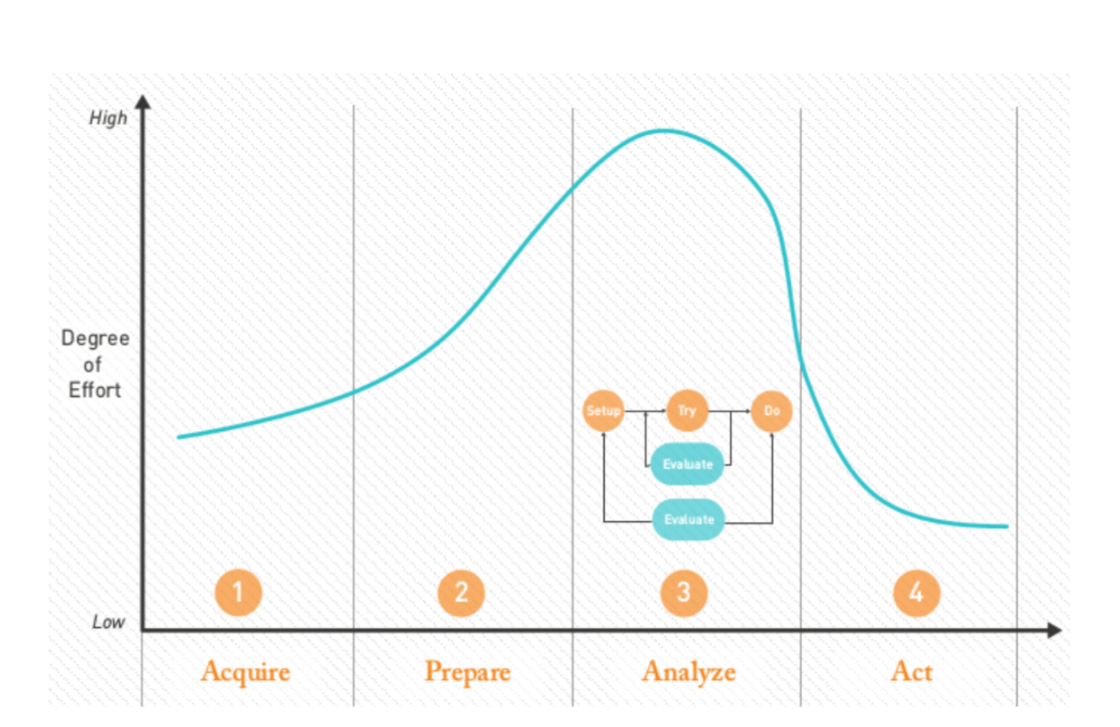

In [0]:
from IPython.display import Image
Image('/content/day 3.png')

# 1. Getting Dataset

In [0]:
# wget helps in downloading the url links
# !wget 'https://archive.ics.uci.edu/ml/machine-learning-databases/audiology/audiology.data'

### Kaggle API Linking


In [0]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"smagni","key":"0ea22017b6052eb6b8adc0ef5988d4dc"}'}

In [0]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d akshgupta/titanic-disaster

  0% 0.00/82.7k [00:00<?, ?B/s]
100% 82.7k/82.7k [00:00<00:00, 25.8MB/s]


In [0]:
!unzip '/content/titanic-disaster.zip'

Archive:  /content/titanic-disaster.zip
  inflating: gender_submission.csv   
  inflating: test (copy).xlsx        
  inflating: test.csv                
  inflating: train (copy).csv        
  inflating: train (copy).xlsx       
  inflating: train.csv               


### To download a git repo

In [0]:
!git clone 'https://github.com/skagnihotri/Wac_may-18_ML'

Cloning into 'Wac_may-18_ML'...
remote: Enumerating objects: 137, done.
remote: Counting objects: 100% (137/137), done.
remote: Compressing objects: 100% (121/121), done.
remote: Total 137 (delta 25), reused 122 (delta 10), pack-reused 0
Receiving objects: 100% (137/137), 44.66 MiB | 27.30 MiB/s, done.
Resolving deltas: 100% (25/25), done.


# Data Analysis and Preprocissing


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv('/content/train.csv')

In [0]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [0]:
df.shape

(891, 12)

In [0]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [0]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [0]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
l1 = ['PassengerId', 'Ticket']

In [0]:
df.drop(l1, axis = 1, inplace = True)

In [0]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [0]:
df.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [0]:
Name = df["Name"].values

In [0]:
New_name = []

for i in Name: # taking a name
    for j in i.split(): # title
        if '.' in j:
            New_name.append(j)
            break

In [0]:
df['New_name'] = New_name

In [0]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,New_name
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S,Mr.
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,Mrs.
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S,Miss.
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,Mrs.
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S,Mr.


In [0]:
df.drop(["Name"], axis = 1, inplace= True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [0]:
df['New_name'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.'], dtype=object)

In [0]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
New_name      0
dtype: int64

In [0]:
df[df['Survived'] == 0]['Sex'].value_counts()

male      468
female     81
Name: Sex, dtype: int64

In [0]:
def Plot_Graph(col_name, type_graph):
    sur = df[df['Survived'] == 1][col_name].value_counts()
    death = df[df['Survived'] == 0][col_name].value_counts()

    temp = pd.DataFrame([sur, death])
    temp.index = ["sur", "death"]
    temp.plot(kind = type_graph)

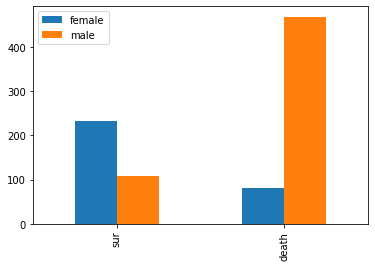

In [0]:
Plot_Graph("Sex", 'bar')

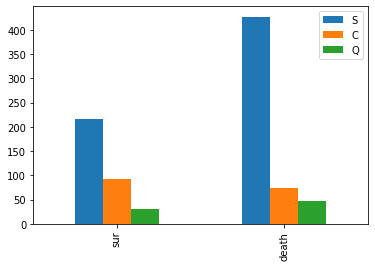

In [0]:
Plot_Graph('Embarked', 'bar')

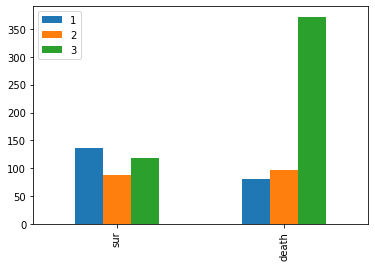

In [0]:
Plot_Graph('Pclass', 'bar')

In [0]:
# Plot_Graph("Age")

In [0]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
New_name      0
dtype: int64

In [0]:
df.shape

(891, 10)

In [0]:
df.drop(["Cabin"], axis = 1, inplace = True)

In [0]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [0]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

In [0]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [0]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [0]:
val = list(df['Embarked'].mode())[0]
df["Embarked"].fillna(val, inplace = True)

In [0]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
 8   New_name  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


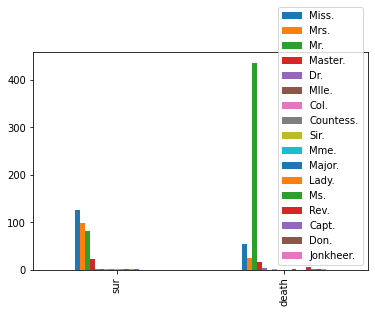

In [0]:
Plot_Graph("New_name", 'bar')

In [0]:
df["New_name"].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.'], dtype=object)

In [0]:
title_map = {"Mr.": 1, "Miss.": 0, "Mrs.": 2, 
                 "Master.": 3, "Dr.": 3, "Rev.": 3, "Col.": 3, "Major.": 3, "Mlle.": 3,"Countess.": 3,
                 "Ms.": 3, "Lady.": 3, "Jonkheer.": 3, "Don.": 3, "Dona." : 3, "Mme.": 3,"Capt.": 3,"Sir.": 3}

In [0]:
A = []
for i in df["New_name"]:
    A.append(title_map[i])

In [0]:
df["mod_name"] = A
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,New_name,mod_name
0,0,3,male,22.0,1,0,7.2500,S,Mr.,1
1,1,1,female,38.0,1,0,71.2833,C,Mrs.,2
2,1,3,female,26.0,0,0,7.9250,S,Miss.,0
3,1,1,female,35.0,1,0,53.1000,S,Mrs.,2
4,0,3,male,35.0,0,0,8.0500,S,Mr.,1


In [0]:
df["mod_name"].unique()

array([1, 2, 0, 3])

In [0]:
df.drop(["New_name"], inplace= True, axis = 1)

In [0]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,mod_name
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,2
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,1


### Label Encoding

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
le_sex = LabelEncoder()
le_emb = LabelEncoder()

In [0]:
df["Sex"] = le_sex.fit_transform(df["Sex"])

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [0]:
df["Sex"]

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int64

In [0]:
le_sex.classes_

array(['female', 'male'], dtype=object)

In [0]:
df["Embarked"] = le_emb.fit_transform(df["Embarked"])

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [0]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [0]:
X = df.iloc[:,1:].values
Y = df.iloc[:, 0].values

In [0]:
X.shape, Y.shape

((891, 7), (891,))

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [0]:
X_train.shape, Y_train.shape

((712, 7), (712,))

## training

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
clf = KNeighborsClassifier()

In [0]:
clf.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred = clf.predict(X_test)

In [0]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0])

In [0]:
(y_pred == Y_test).sum()

126

In [0]:
len(y_pred)

179

In [0]:
(y_pred == Y_test).sum()/len(y_pred)

0.7039106145251397

In [0]:
clf.score(X_train, Y_train)

0.8103932584269663

In [0]:
clf.score(X_test, Y_test)

0.7039106145251397

In [0]:
from sklearn.svm import SVC

In [0]:
clf1 = SVC(C = 10)

In [0]:
clf1.fit(X_train, Y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
y_pred1 = clf1.predict(X_test)

In [0]:
(y_pred1 == Y_test).sum()

129

In [0]:
clf1.score(X_train, Y_train)

0.726123595505618

In [0]:
clf1.score(X_test, Y_test)

0.7206703910614525

In [0]:
pd.DataFrame(y_pred1).to_csv("predictions.csv")